# NEHA RAGESH NAMBIAR
20BRS1110

# BASIC IMPLEMENTATION

In [2]:
import random

X = [

    [(1, 1), 1],
    [(1, -1), -1],
    [(-1, 1), -1],
    [(-1, -1), -1]
]

def activation_function(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1

def run_perceptron(X1):
    bias = (1,)
    learning_constant = 0.1
    epochs = 50

    weights = []


    for i in range(3):
        weights.append(random.uniform(-1, 1))

    for i in range(epochs):
        inputs, expected_output = random.choice(X1)
        
        inputs = inputs + bias 
        weighted_sum = np.dot(inputs, weights,out = None)
        predicted =  activation_function(weighted_sum)
        error = expected_output - predicted
        weights += learning_constant * error * np.asarray(inputs) 


    inputs, expected_output = random.choice(X1)
    print( "inputs: " + str(inputs))
    inputs = inputs + bias
    print("weighted sum: " + str(weighted_sum))
    print( "correct answer: " + str(expected_output))
    print ("perceptron predicted: " + str(activation_function(weighted_sum)) + '\n')


    

In [3]:
run_perceptron(X)

inputs: (1, 1)
weighted sum: -0.24156681205427893
correct answer: 1
perceptron predicted: -1



# A BETTER IMPLEMENTATION

Epoch: 0, Loss: 1.8579, Time: 0.0357s
Epoch: 1, Loss: 0.3740, Time: 0.0321s
Epoch: 2, Loss: 0.2230, Time: 0.0325s
Epoch: 3, Loss: 0.2095, Time: 0.0299s
Epoch: 4, Loss: 0.2056, Time: 0.0314s
Epoch: 5, Loss: 0.2031, Time: 0.0305s
Epoch: 6, Loss: 0.2011, Time: 0.0334s
Epoch: 7, Loss: 0.1995, Time: 0.0406s
Epoch: 8, Loss: 0.1980, Time: 0.0295s
Epoch: 9, Loss: 0.1967, Time: 0.0315s
Epoch: 10, Loss: 0.1955, Time: 0.0315s
Epoch: 11, Loss: 0.1944, Time: 0.0314s
Epoch: 12, Loss: 0.1933, Time: 0.0310s
Epoch: 13, Loss: 0.1923, Time: 0.0316s
Epoch: 14, Loss: 0.1913, Time: 0.0348s
Epoch: 15, Loss: 0.1903, Time: 0.0316s
Epoch: 16, Loss: 0.1894, Time: 0.0315s
Epoch: 17, Loss: 0.1884, Time: 0.0319s
Epoch: 18, Loss: 0.1875, Time: 0.0243s
Epoch: 19, Loss: 0.1865, Time: 0.0321s
Epoch: 20, Loss: 0.1856, Time: 0.0194s
Epoch: 21, Loss: 0.1846, Time: 0.0286s
Epoch: 22, Loss: 0.1837, Time: 0.0384s
Epoch: 23, Loss: 0.1827, Time: 0.0345s
Epoch: 24, Loss: 0.1817, Time: 0.0299s
Epoch: 25, Loss: 0.1807, Time: 0.03

C:\Users\NehRagNam\AppData\Local\Temp\ipykernel_60068\3785620371.py:130: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


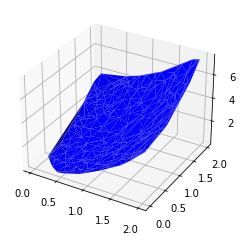

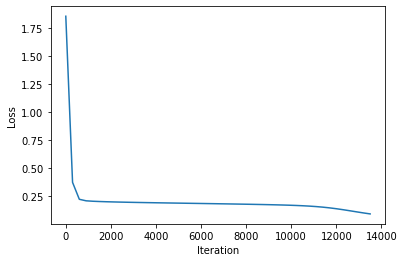

TEST RESULT
MAE 1.85:  MSE 5.74: 


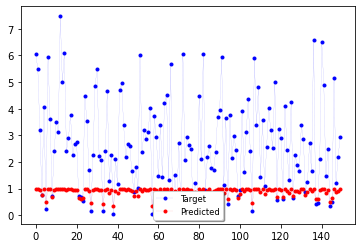

C:\Users\NehRagNam\AppData\Local\Temp\ipykernel_60068\3785620371.py:175: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


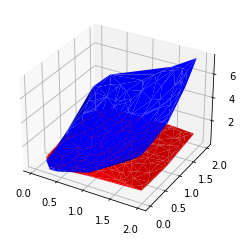

In [8]:

import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

#Network Layers
hiddenLayerDim = 10
inputDim = 2
outputLayerDim = 1

#Training parameters
learning_rate = 0.01
error_rate = 0.1

n_trainSample = 300
n_testSample = 150

#Error Functions
def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)))

def mean_squared_error(y_true, y_pred):
    return (np.square(y_true - y_pred)).mean(axis=None)


#Activation Functions
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x)) 

def reLu(x):
    return x*(x>0)

def tanh_deriv(x):
    return  1 - np.tanh(x)**2


#Network Functions
def propagation(x, t,network):
    
    hiddenLayer = network[0]
    OutputLayer = network[1]
    hiddenBias = network[2]
    outputBias = network[3]
 
    # forward propagation
    A = np.dot(x,hiddenLayer) + hiddenBias
    Z = np.tanh(A)

    B = np.dot(Z,OutputLayer) + outputBias
    Y = reLu(B)
    
    #loss function
    loss = mean_squared_error(t,Y)

    # backward propagation
    Eout = Y - t
    Ehid = tanh_deriv(A) * np.dot(OutputLayer, Eout)
    dOut = np.outer(Z, Eout)
    dHid = np.outer(x, Ehid)
 
    #update weights
    grad = (dHid, dOut, Ehid, Eout)
    for j in range(len(network)):
        network[j] -= learning_rate * grad[j] 
                  
    return  loss

def initialize_network():
    
    hiddenLayer = np.random.normal(scale=0.1, size=(inputDim, hiddenLayerDim))
    outputLayer = np.random.normal(scale=0.1, size=(hiddenLayerDim, outputLayerDim))
    hiddenBias = np.zeros(hiddenLayerDim)
    outputBias = np.zeros(outputLayerDim)
    
    return [hiddenLayer,outputLayer,hiddenBias,outputBias]

def train(error_rate):
    
    hist_losses = list()
    mean_loss = float('inf')
    epoch = 0
    while (mean_loss > error_rate):
        
        #epoch
        err = list()  
        t0 = time.perf_counter()      
        for iteration in range(len(X_train)): 
            loss= propagation(X_train[iteration], T[iteration], network)
            err.append( loss )
            
        mean_loss = np.mean( err )  #for each epoch
        print ("Epoch: %d, Loss: %.4f, Time: %.4fs" % ( epoch,mean_loss, time.perf_counter()-t0 ) )   
        epoch +=1
        hist_losses.append(mean_loss)
    return hist_losses,epoch

def predict(x,network):
    
    hiddenLayer = network[0]
    OutputLayer = network[1]
    hiddenBias = network[2]
    outputBias = network[3]
    
    A = np.dot(x,hiddenLayer) + hiddenBias
    B = np.dot(np.tanh(A),OutputLayer) + outputBias
    return sigmoid(B)


# Initializing the network
network = initialize_network()

#Train Data
random.seed(33)

x =np.array([ random.uniform(0,2) for _ in range(n_trainSample) ])
y =np.array([ random.uniform(0,2) for _ in range(n_trainSample) ])

T =  x**2 + y**2
X_train= [[x[i],y[i]] for i in range(len(x))]
X_train= np.array(X_train)
T = np.array(T)

# Train
hist_losses,epoch = train(error_rate)

#3D Train Data Graph
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, T, color='blue',linewidth=0.2, antialiased=True)
plt.show()


#iteration vs loss graph
x_axis = [i*n_trainSample for i in range(epoch)]
plt.figure()
plt.plot(x_axis,hist_losses,linestyle = '-')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Test Data
x = np.linspace(0, 2, n_testSample)
y = np.linspace(0, 2, n_testSample)
random.shuffle(x)
random.shuffle(y)
X_test = [[x[i],y[i]] for i in range(len(x))]

#prediction
pred= list()
for i in range(len(X_test)):
    pred.append(predict(X_test[i], network))

Z1 = (x ** 2 + y ** 2).reshape(n_testSample)  #target
Z2 = (np.array(pred)).reshape(n_testSample)   #predicted

print('TEST RESULT\n'
      'MAE %.2f: '%mean_absolute_error(Z1,Z2),
      'MSE %.2f: '%mean_squared_error(Z1,Z2),
      )

#prediction of Z values graph
x_axis = [i for i in range(n_testSample)]
plt.figure()
plt.plot(x_axis,Z1,linestyle = 'dashed',color='blue',
         marker = '.',label='Target',linewidth = '0.1')
plt.plot(x_axis,pred,linestyle = 'dashed',color='red',
         marker = '.',label='Predicted',linewidth = '0.1')
legend = plt.legend(loc='lower center', shadow=True, fontsize='small')
plt.show()

#3d target vs predicted graph
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, Z1, color='blue',linewidth=0.2, antialiased=True,label='Target')
ax.plot_trisurf(x, y, Z2, color='red',linewidth=0.2, antialiased=True,label='Predicted')
plt.show()
